In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import os
import tabulate as tb

In [3]:
%matplotlib inline

In [4]:
# !pip install tabulate
# !python -m spacy download en
# !pip install spacy
# !pip install igraph
# !pip install -U seaborn
# !pip install community
# !pip install python-louvain

In [5]:
import seaborn as sns

In [6]:
sns.set_style("darkgrid")

# Analyze

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import os
import tabulate as tb

%matplotlib inline

In [8]:
df = pd.read_csv("weighted_graph_2_news_politics/df_filtered_weighted.csv")
cluster_labels = pd.read_csv("weighted_graph_2_news_politics/labeled_communities_weighted.csv")
videos_links = pd.read_csv("weighted_graph_2_news_politics/links_weighted.csv")

In [9]:
cluster_labels

,video_label,cluster,video_id
0,33645,0,4_uxu7w2eq0
1,178718,1,SedClkAnclk
2,261586,0,fTpQ5FZivpg
3,146450,13,NJo9VdTtRYs
4,107483,1,Gpl2uF1SrDA
...,...,...,...
163311,333283,7,rSJu7zg9hjY
163312,227539,15,_l6WVsGhBAA
163313,232572,4,abZby97tiaY
163314,302054,1,mCPz894jSIo


### Smth analysis

In [10]:
videos = pd.read_csv("../../final_labelled.csv").iloc[:,1:]  # ommit 1st column

In [11]:
cluster_labels.rename(columns={"video_id": "display_id"}, inplace=True)

In [12]:
videos_clusters = cluster_labels.merge(videos, on='display_id')

In [13]:
video_tags = pd.read_csv("weighted_graph_2_news_politics/clustered_videos_info.csv", usecols=['display_id', 'tags'])

In [14]:
videos_clusters = videos_clusters.merge(video_tags, on='display_id')

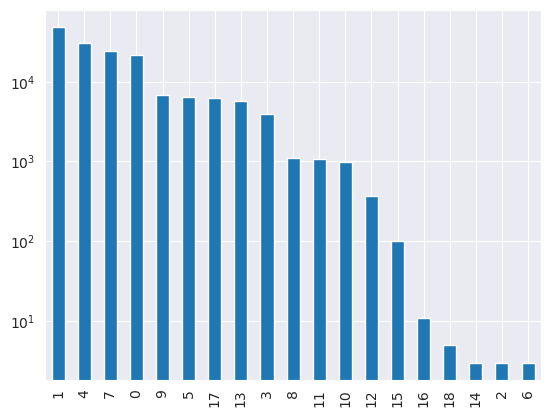

In [15]:
# count data in each cluster
videos_clusters.cluster.value_counts().plot(kind="bar")
plt.yscale('log')

In [16]:
videos_clusters.isna().sum()

video_label                    0
cluster                        0
display_id                     0
channel_id                     0
upload_date                    0
like_count                   126
dislike_count                126
view_count                     0
democrat                       0
republican                     0
negative_sentiment_score       0
neutral_sentiment_score        0
positive_sentiment_score       0
tags                        5897
dtype: int64

## Join sentiments to data frow clusters

In [17]:
SENTIMENTS_COLS_BEFORE = ['negative_sentiment_score', 'neutral_sentiment_score', 'positive_sentiment_score']
SENTIMENTS_COLS = ['negative', 'neutral', 'positive']

videos_clusters.rename(columns=dict(zip(SENTIMENTS_COLS_BEFORE, SENTIMENTS_COLS)), inplace=True)
videos_clusters.rename(columns={"display_id": "video_id"}, inplace=True)

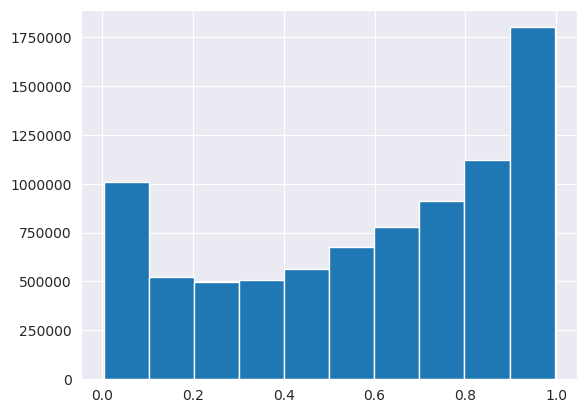

In [18]:
videos.republican.hist()

In [19]:
videos

,display_id,channel_id,upload_date,like_count,dislike_count,view_count,democrat,republican,negative_sentiment_score,neutral_sentiment_score,positive_sentiment_score
0,dfa8RRkKoa4,UCzWm1-4XF7AHxVUTkHCM1uw,2018-08-23 00:00:00,25.0,16.0,478.0,0.050902,0.949213,0.0,1.0,0.0
1,_dIIEMvH86k,UCzWLsxDD373D4tY8kN-0LGQ,2015-01-04 00:00:00,9.0,0.0,865.0,0.508231,0.490137,0.0,1.0,0.0
2,eWXefhNB2po,UCzVBu6oqlrAix0oq9T2rBFg,2019-04-24 00:00:00,625.0,89.0,12780.0,0.817460,0.180474,0.0,0.0,1.0
3,MBgzne7djFU,UCzUV5283-l5c0oKRtyenj6Q,2019-10-03 00:00:00,47027.0,195.0,374711.0,0.101138,0.899285,0.0,0.0,1.0
4,AbH3pJnFgY8,UCzUV5283-l5c0oKRtyenj6Q,2019-10-02 00:00:00,36384.0,114.0,245617.0,0.168151,0.831550,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
8384919,5J3_2AcI83s,UCfHRX7ihY8WnSV53NnpKOvQ,2011-05-24 00:00:00,248.0,50.0,350722.0,0.040515,0.960173,0.0,0.0,1.0
8384920,NxL0B0JF9BI,UCfHRX7ihY8WnSV53NnpKOvQ,2011-05-02 00:00:00,3.0,3.0,3089.0,0.376157,0.622676,0.0,0.0,1.0
8384921,8FSQzJ9dd7o,UCfHRX7ihY8WnSV53NnpKOvQ,2011-05-02 00:00:00,199.0,16.0,99644.0,0.368228,0.633008,0.0,0.0,1.0
8384922,gzH6BrNj0L4,UCfHRX7ihY8WnSV53NnpKOvQ,2011-04-30 00:00:00,35.0,2.0,7219.0,0.409053,0.589437,0.0,0.0,1.0


## Filter videos that are certain to be in political spectrum

In [20]:
condlist = [videos_clusters.democrat >= 0.8, videos_clusters.republican > 0.8]
choicelist = ['democrat', 'republican']
videos_clusters['spectrum'] = np.select(condlist, choicelist, None)

In [21]:
size1 = videos_clusters.shape[0]
videos_clusters = videos_clusters[videos_clusters.spectrum.notna()]
size2 = videos_clusters.shape[0]
f"Dropped {(size1 - size2):,} unsure videos"

'Dropped 59,868 unsure videos'

In [22]:
print(videos_clusters.shape[0])
videos_clusters = videos_clusters.dropna()
print(videos_clusters.shape[0])

97964
94156


## Engineer feature

In [23]:
videos_clusters.like_count

0          1426.0
1          4751.0
3           212.0
5         22682.0
9         26335.0
           ...   
157823      229.0
157824      975.0
157826       37.0
157828     2622.0
157831      556.0
Name: like_count, Length: 94156, dtype: float64

In [24]:
likes_count = videos_clusters.like_count+videos_clusters.dislike_count
videos_clusters['dislike_ratio'] = videos_clusters.dislike_count/likes_count
videos_clusters['like_ratio'] = videos_clusters.like_count/likes_count

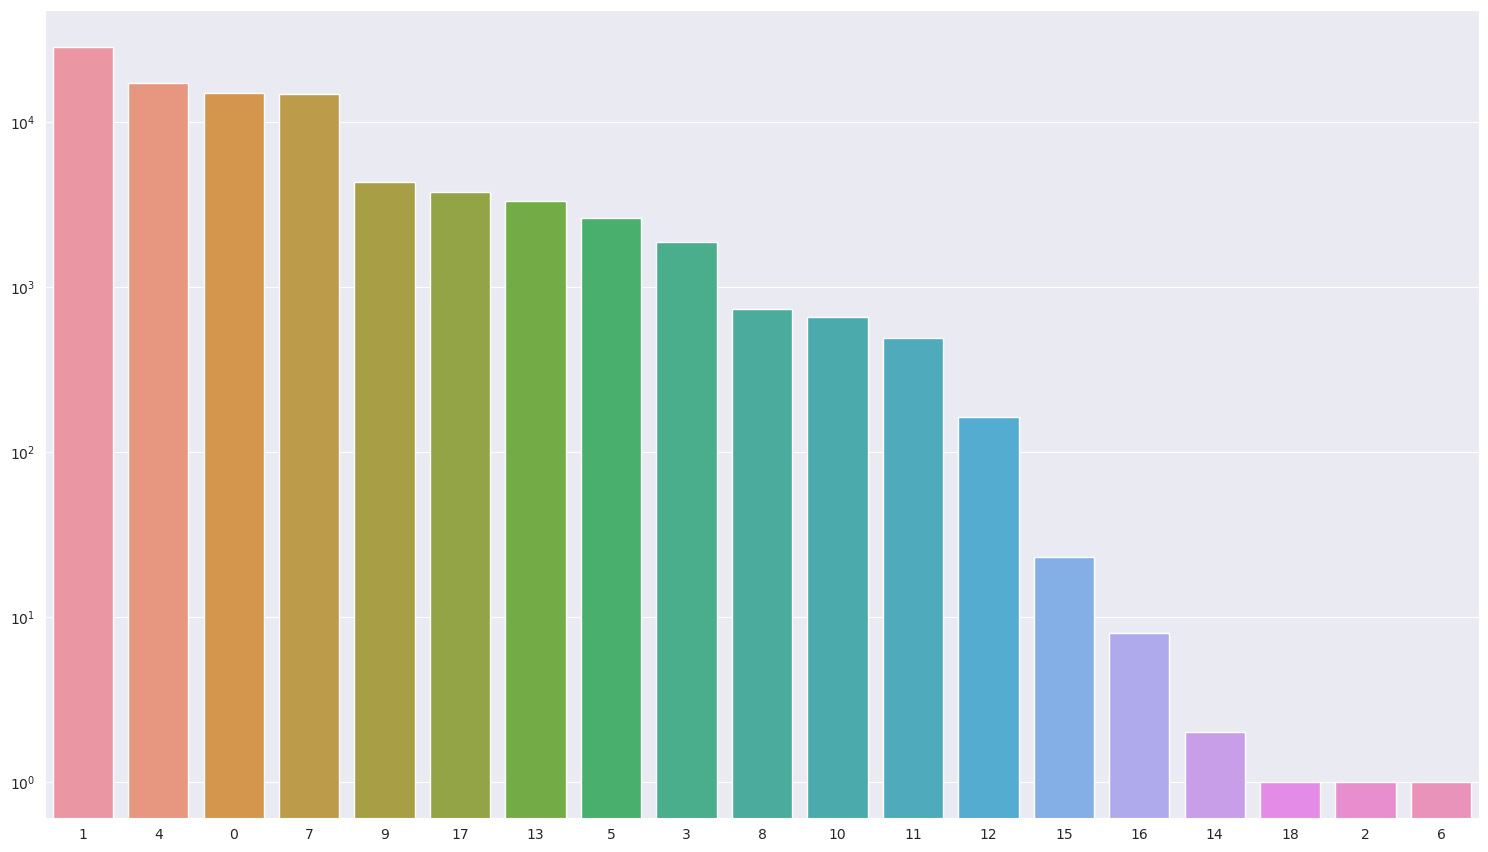

In [25]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
counts = videos_clusters.cluster.value_counts().sort_values(ascending=False)
sns.barplot(counts.index, counts.values, order=counts.index)
plt.yscale('log')

In [28]:
# fig = plt.gcf()
# fig.set_size_inches(18.5, 10.5)
# sns.barplot(data=videos_clusters
#             , x="cluster", y="like_ratio", hue="spectrum")
# plt.ylim(0.6); plt.title("Like ratios per cluster and spectrum", size=16)

In [188]:
clusters_spectrum_ratio = videos_clusters.groupby("cluster").spectrum.value_counts().to_frame('count').join(videos_clusters.groupby("cluster").spectrum.value_counts(normalize=True))
clusters_spectrum_ratio.rename(columns={"spectrum": "spectrum_ratio"}, inplace=True)

In [168]:
clusters_spectrum_ratio = clusters_spectrum_ratio.sort_values(by=['spectrum', 'spectrum_ratio'], ascending=True)

In [150]:
# clusters_spectrum_ratio = clusters_spectrum_ratio.reset_index(level=1).sort_values(by=['spectrum', 'spectrum_ratio'], ascending=True)

In [151]:
# clusters_spectrum_ratio = clusters_spectrum_ratio.reset_index()

In [164]:
i = 0
for index in clusters_spectrum_ratio.index:
    clusters_spectrum_ratio.at[index, 'order'] = i
    i+=1

In [189]:
clusters_spectrum_ratio

count  spectrum_ratio
cluster spectrum                         
0       democrat    11209        0.745329
        republican   3830        0.254671
1       republican  14981        0.518715
        democrat    13900        0.481285
2       republican      1        1.000000
3       republican   1093        0.577696
        democrat      799        0.422304
4       democrat     9128        0.525262
        republican   8250        0.474738
5       republican   2193        0.830367
        democrat      448        0.169633
6       republican      1        1.000000
7       democrat     9664        0.653768
        republican   5118        0.346232
8       democrat      587        0.797554
        republican    149        0.202446
9       democrat     3658        0.838222
        republican    706        0.161778
10      democrat      402        0.610942
        republican    256        0.389058
11      republican    402        0.815416
        democrat       91        0.184584
12      democrat      133        0.815951
        republican     30        0.184049
13      democrat     1906        0.573233
        republican   1419        0.426767
14      republican      2        1.000000
15      republican     16        0.695652
        democrat        7        0.304348
16      republican      8        1.000000
17      republican   2163        0.574045
        democrat     1605        0.425955
18      republican      1        1.000000

In [170]:
clusters_spectrum_ratio.reset_index().head()

,cluster,spectrum,count,spectrum_ratio
0,5,democrat,448,0.169633
1,11,democrat,91,0.184584
2,15,democrat,7,0.304348
3,3,democrat,799,0.422304
4,17,democrat,1605,0.425955


In [185]:
my_order = clusters_spectrum_ratio.reset_index().groupby(by=["cluster"])["spectrum_ratio"].index

AttributeError: 'SeriesGroupBy' object has no attribute 'index'

In [180]:
my_order

Int64Index([18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0], dtype='int64', name='cluster')

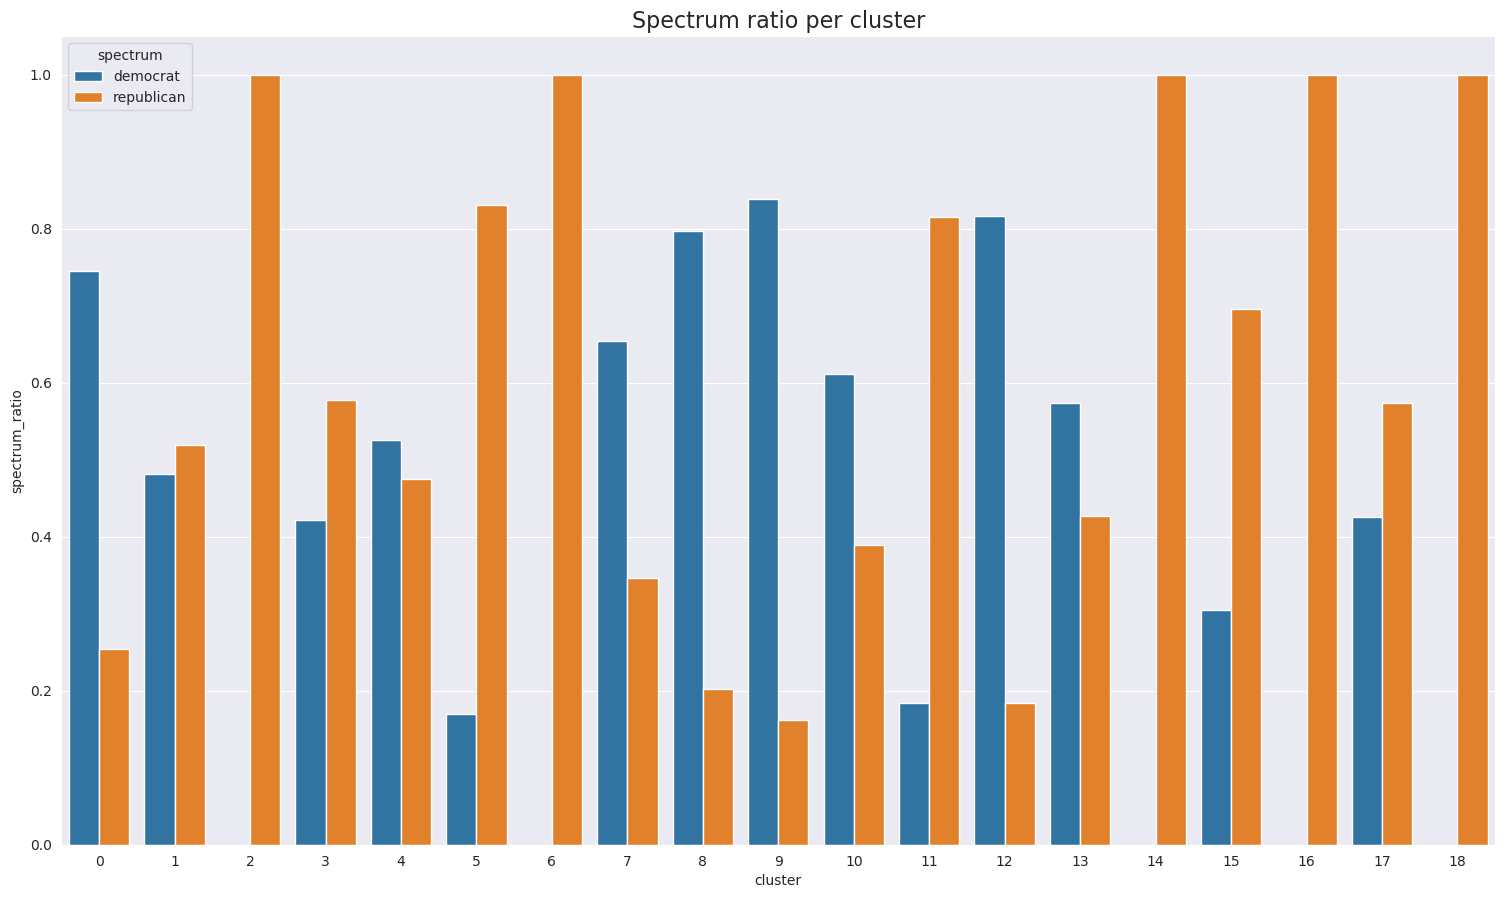

In [194]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.barplot(data=clusters_spectrum_ratio.reset_index()
            , x='cluster', y="spectrum_ratio", hue="spectrum",
           order=my_order.get_level_values(0))
plt.title("Spectrum ratio per cluster", size=16)
plt.savefig("spectrum_ratio_plot.png", dpi=300)

In [26]:
videos_clusters.tags

0         the ring of fire,progressive news,trofire,poli...
1         league of denial,espn nfl,junior seau,cte nfl,...
3         Maria Bartiromo,Mornings With Maria,Apple News...
5         NowThis,NowThisNews,Now This News,NowThis News...
9         NowThis,NowThisNews,Now This News,NowThis News...
                                ...                        
157823    Democrats,Roland Martin,#RolandMartinUnfiltere...
157824    Kate Middleton,James Middleton,Prince George,P...
157826    Neil Cavuto,Your World,Elections,Democrats,Pre...
157828    Gujob,Gujob Bangladesh,Gujob Student Protest,M...
157831    black people,black scholars,african american s...
Name: tags, Length: 94156, dtype: object

### Topics per cluster

In [42]:
from collections import Counter

In [35]:
tags_per_video = [tag.split(',') for tag in videos_clusters.tags]
len(tags_per_video)

94156

In [39]:
def create_vocabulary_frequency(documents, vocab_len):
    '''Select top-k (k = vocab_len) words in term of frequencies as vocabulary'''
    
    count = {}
    for document in documents:
        for tag in document:
            tag = tag.lower().strip()
            if tag in count:
                count[tag] += 1
            else:
                count[tag] = 1
    
    sorted_count_by_freq = sorted(count.items(), key=lambda kv: kv[1], reverse=True)

    vocabulary = [x[0] for x in sorted_count_by_freq[:vocab_len]]
    return vocabulary

vocabulary = create_vocabulary_frequency(tags_per_video, 1000)

In [45]:
def construct_term_document_matrix(vocabulary, documents):
    # Construct term-doc matrix
    matrix = np.zeros((len(vocabulary), len(documents)))
    print(matrix.shape)
    for j, document in enumerate(documents):
        counter = Counter(document)
        for i, word in enumerate(vocabulary):
            if word in counter:
                matrix[i,j] = counter[word]
    return matrix

In [46]:
bag_of_words = construct_term_document_matrix(vocabulary, tags_per_video)

(1000, 94156)


In [52]:
bag_of_words = pd.DataFrame(data=bag_of_words.T, columns=vocabulary, index=videos_clusters.video_id)

In [176]:
bag_of_words.to_csv("bag_of_words_1000.csv", index=True)

In [55]:
bag_of_words.sum(axis=0).head(50)

news                    21364.0
politics                22280.0
donald trump            12592.0
trump                    8946.0
tyt                      5173.0
the young turks          6027.0
fox news                 2962.0
progressive              6292.0
liberal                  6698.0
personality              1319.0
cenk uygur                367.0
breaking news            5520.0
on air                     23.0
white house              3633.0
tyt network              1129.0
republican               3444.0
progressive news         6220.0
president trump          3833.0
world news               4328.0
gop                      2022.0
fox news channel          267.0
republicans              2518.0
inside_edition           4989.0
democrat                 4019.0
us news                  3971.0
democrats                2229.0
bernie sanders           1794.0
hillary clinton          1920.0
inside edition           4043.0
special                   522.0
ana kasparian             535.0
congress

### Analyze bag of words

In [188]:
bag_of_words = pd.read_csv("bag_of_words_1000.csv")

In [199]:
bag_of_words.index = bag_of_words.video_id
bag_of_words.drop(columns=['video_id'], inplace=True)

In [236]:
list(bag_of_words.columns).index('election')

55

In [237]:
elections_videos = bag_of_words[bag_of_words.elections >= 1.0].index

In [238]:
videos_clusters[videos_clusters.video_id.isin(elections_videos)].cluster.value_counts()

1     270
0     116
7      66
13     50
17     44
4      42
3      20
10      9
5       2
9       1
Name: cluster, dtype: int64

### Get k most frequent tags in each cluster

In [209]:
k = 10

videos_per_cluster = t_h_data.cluster.value_counts()
for cluster_val in t_h_data.cluster.unique():
    video_ids_cluster = videos_clusters[videos_clusters.cluster == cluster_val].video_id
    bow_cluster = bag_of_words.loc[video_ids_cluster]
    term_freq_cluster = bow_cluster.sum().sort_values(ascending=False)
    print(f"Cluster {cluster_val} has most frequent terms\n", term_freq_cluster[:k])
    print('-'*40)
    # bow_cluster = bag_of_words.loc[[]]
    # first = 100*videos_per_cluster.loc[cluster_val]
    # ratio_videos = first/(videos_clusters.cluster==cluster_val).sum()
    # print(f"Cluster {cluster_val} contains {ratio_videos:.4}% contaning tags D Trump and H Clinton")

Cluster 0 has most frequent terms
 politics                7150.0
progressive news        5517.0
donald trump            5353.0
news                    4110.0
trofire                 3441.0
the ring of fire        3427.0
trump                   3380.0
the young turks         3060.0
tyt                     3030.0
trump administration    2613.0
dtype: float64
----------------------------------------
Cluster 3 has most frequent terms
 politics          468.0
news              395.0
donald trump      384.0
trump             355.0
tim pool          216.0
timcast           209.0
fake news         169.0
free speech       169.0
social justice    162.0
sjw               141.0
dtype: float64
----------------------------------------
Cluster 1 has most frequent terms
 politics           5871.0
donald trump       3312.0
trump              3033.0
president trump    2521.0
news               2408.0
white house        1758.0
personality        1270.0
us news            1201.0
on_air              990.0

politics            7150.0
progressive news    5517.0
donald trump        5353.0
news                4110.0
trofire             3441.0
                     ...  
venus                  0.0
habibi                 0.0
#maga                  0.0
vlogger                0.0
dn                     0.0
Length: 1000, dtype: float64

In [185]:
video_ids_cluster

0         4_uxu7w2eq0
5         HVwtUmn0zJY
9         pefFs4lqvz0
59        F5-wDPfm8jU
112       w9KzdwmIbcI
             ...     
157772    TlIIDeOmOh0
157786    9_R3xvxP8xU
157788    WDQxhp6-5Io
157816    Syg3bU8L3og
157831    7Hqcl5vR8sY
Name: video_id, Length: 15039, dtype: object

### Analyze Trump, Hillary tags

In [212]:
trump_videos = bag_of_words[(bag_of_words['donald trump'] >= 1.0) | (bag_of_words['trump'] >= 1.0) | (bag_of_words['president trump'] >= 1.0)].index
clinton_videos = bag_of_words[bag_of_words['hillary clinton'] >= 1.0].index

clinton_trump_videos = bag_of_words[(bag_of_words['hillary clinton'] >= 1.0) & (bag_of_words['donald trump'] >= 1.0)].index

In [213]:
trump_videos.shape, clinton_videos.shape, clinton_trump_videos.shape

((16333,), (1920,), (1067,))

### Find which clusters have trump, hillary tags

In [219]:
t_h_data = videos_clusters[videos_clusters.video_id.isin(clinton_trump_videos)]

In [220]:
videos_per_cluster = t_h_data.cluster.value_counts()
for cluster_val in t_h_data.cluster.unique():
    first = 100*videos_per_cluster.loc[cluster_val]
    ratio_videos = first/(videos_clusters.cluster==cluster_val).sum()
    print(f"Cluster {cluster_val} contains {ratio_videos:.4}% contaning tags D Trump and H Clinton")

Cluster 7 contains 3.308% contaning tags D Trump and H Clinton
Cluster 3 contains 1.586% contaning tags D Trump and H Clinton
Cluster 13 contains 2.556% contaning tags D Trump and H Clinton
Cluster 4 contains 0.3855% contaning tags D Trump and H Clinton
Cluster 0 contains 1.19% contaning tags D Trump and H Clinton
Cluster 1 contains 0.6302% contaning tags D Trump and H Clinton
Cluster 17 contains 0.5839% contaning tags D Trump and H Clinton
Cluster 10 contains 0.152% contaning tags D Trump and H Clinton
Cluster 9 contains 0.2291% contaning tags D Trump and H Clinton
Cluster 8 contains 0.1359% contaning tags D Trump and H Clinton
Cluster 12 contains 0.6135% contaning tags D Trump and H Clinton


In [218]:
videos_clusters.cluster.value_counts()

1     28881
4     17378
0     15039
7     14782
9      4364
17     3768
13     3325
5      2641
3      1892
8       736
10      658
11      493
12      163
15       23
16        8
14        2
18        1
2         1
6         1
Name: cluster, dtype: int64

### Get graph of videos that were labelled to clusters

In [88]:
videos_cluster_7 = cluster_labels[cluster_labels.cluster == 7]

In [89]:
videos_clusters.rename(columns={"video_id": "display_id"}, inplace=True)

In [93]:
# join policital spectrum to video
videos_cluster_7 = videos_cluster_7.merge(videos_clusters[['display_id', 'spectrum']], on="display_id")

In [79]:
videos_links = pd.read_csv("weighted_graph_2_news_politics/links_weighted.csv")

In [84]:
cluster_7_links = videos_links[(videos_links.source_id.isin(list(videos_cluster_7.display_id))) & (videos_links.target_id.isin(list(videos_cluster_7.display_id)))][['source', 'target']]

In [94]:
videos_cluster_7 = videos_cluster_7[['video_label', 'cluster', 'spectrum']].reset_index(drop=True).reset_index().rename(columns={'video_label': "id"})

In [98]:
condlist = [videos_cluster_7.spectrum == 'democrat', videos_cluster_7.spectrum == 'republican']
choicelist = ['#215ac4', '#c72830']
videos_cluster_7['node_color'] = np.select(condlist, choicelist, None)

In [104]:
videos_cluster_7[['id', 'node_color']].to_csv("cluster_7_labels.csv", index=False)

In [ ]:
["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(10)]

['#AC9637',
 '#33DABF',
 '#8BC531',
 '#A63971',
 '#06EF11',
 '#C3BBDB',
 '#9381B2',
 '#0383E1',
 '#B2FF41',
 '#83271D']

## Analyze clusters

In [146]:
from functools import partial
import matplotlib.dates as md

In [157]:
cluster0 = videos_clusters[videos_clusters.cluster == 0]

In [158]:
trump_data = cluster0[cluster0.video_id.isin(trump_videos)]

In [160]:
trump_data['upload_date'] = pd.to_datetime(trump_data['upload_date'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


upload_date
2015-08-18     1377.0
2015-10-15      284.0
2015-11-12      283.0
2015-12-23     1842.0
2016-02-28     4607.0
               ...   
2019-09-28    15093.0
2019-09-29    22447.0
2019-09-30     5164.0
2019-10-01    21927.0
2019-10-02    17815.0
Name: like_count, Length: 1017, dtype: float64

In [161]:
trump_data = trump_data.sort_values(by='upload_date')

In [ ]:
# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = 1))
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
# (optional) rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)

# specify the position of the minor ticks at each day
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))

Text(0.5, 1.0, 'Likes under Trump videos over time')

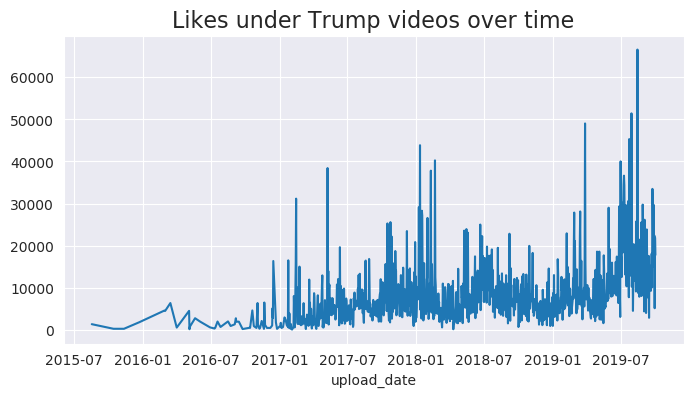

In [174]:
fig, ax = plt.subplots(figsize=(8, 4))
like_count_trump = trump_data.groupby('upload_date').like_count.sum()
sns.lineplot(ax=ax, x=like_count_trump.index, y=like_count_trump.values)
plt.title("Likes under Trump videos over time", size=16)

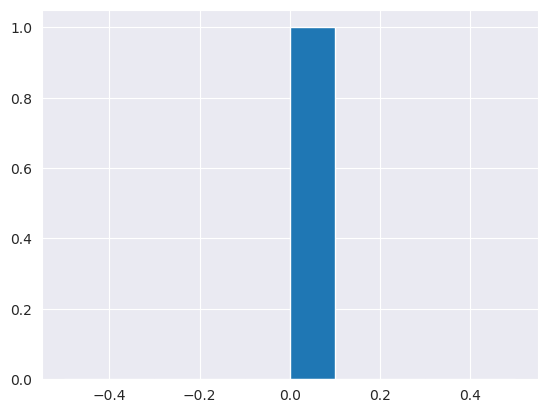

In [27]:
cluster1.positive.hist()

In [197]:
cluster1.channel_id.unique().shape

(335,)

In [201]:
cluster1.video_id.head(20)

11      jRypGzd3KLA
24      eJTQMA6mGRU
53      vs4v4WcalkQ
153     SufmSo4CCrE
230     5_6wTNEXiRw
249     BbxB9TdtxBY
287     yTOlYnhnDNc
299     mav2kkvakGY
314     tNsajdUETlw
890     8EtnQQrDXpw
1247    a9vvgtv35RU
1251    aa7XuPPRxzs
1263    gpYPL62fvnU
1527    OQR_X0qKwyE
1545    PhRmC6QbL6c
1546    3ZrDQTsM7ko
1547    oxeE15GGrD8
1550    LvYNHSf7FbI
1551    m3ggq7T9sEA
1552    C-d_qhJieHc
Name: video_id, dtype: object

In [200]:
cluster1.spectrum.value_counts()/cluster1.spectrum.value_counts().sum()

republican    0.872562
democrat      0.127438
Name: spectrum, dtype: float64

In [ ]:
labels

In [263]:
df_2[df_2.video_id == "Gpl2uF1SrDA"]

,author,likes,replies,video_label,video_id
1580553,4904768,69.0,19.0,263311,Gpl2uF1SrDA
4114144,315167044,26.0,11.0,263311,Gpl2uF1SrDA
5597832,7654,28.0,19.0,263311,Gpl2uF1SrDA
6860163,54008120,33.0,11.0,263311,Gpl2uF1SrDA
8128739,77084429,21.0,25.0,263311,Gpl2uF1SrDA
9438300,518962373,48.0,17.0,263311,Gpl2uF1SrDA
10331226,51966361,151.0,99.0,263311,Gpl2uF1SrDA
13575202,72715689,46.0,23.0,263311,Gpl2uF1SrDA


0
1
2
3
4


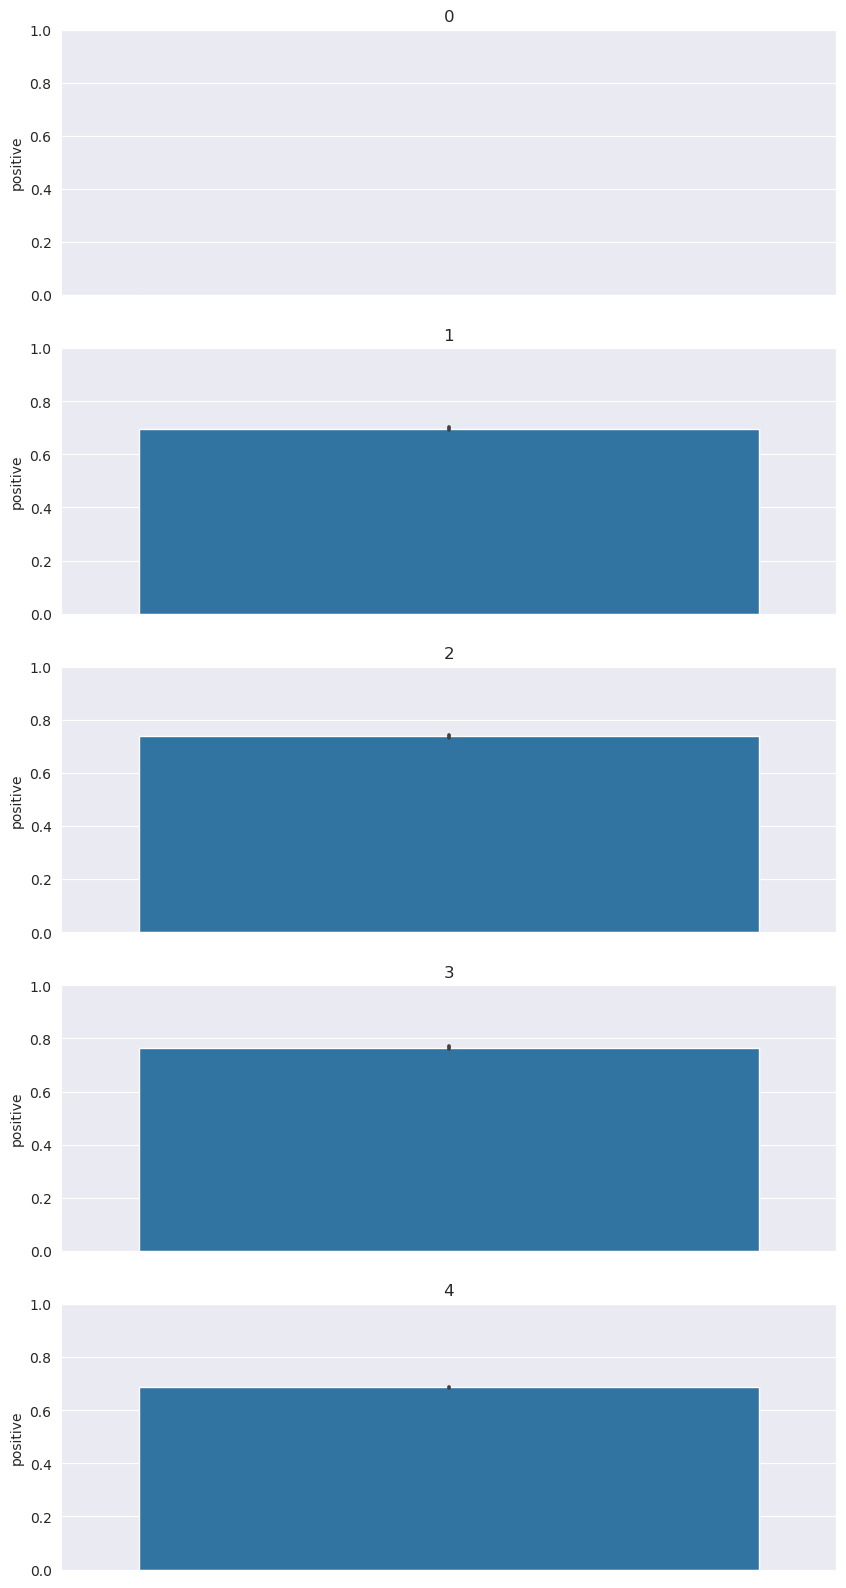

In [146]:
NOF=5
fig, axes = plt.subplots(NOF, 1, figsize=(10, 20))

for cluster in clustered_count.index:
    if cluster == NOF:
        break
    print(cluster)
    sns.barplot(data=labels[labels.cluster == cluster],
                y='positive',
                hue='spectrum',
                ax=axes[cluster])
    axes[cluster].set_ylim([0, 1])
    axes[cluster].set_title(cluster)
plt.show()

## Get cluster which have mostly negative videos

In [147]:
# calculate the ratio for negative
# labels['negative'] 

data = labels.groupby("cluster").sum()
data[SENTIMENTS_COLS] = data[SENTIMENTS_COLS].apply(lambda x: x/x.sum(), axis=1).values

In [148]:
neg_cluster_labels = list(data[data.negative >= 0.90].index)
print("Clusters with negative sentiment: ", neg_cluster_labels)

Clusters with negative sentiment:  [26, 44]


In [149]:
cluster_neg = labels[labels.cluster.isin(neg_cluster_labels)]

In [151]:
cluster_neg.groupby('cluster').count().sort_values(by='video_id')

,video_id,spectrum,negative,neutral,positive
cluster,,,,,
44,2,2,2,2,2
26,55,55,55,55,55


In [164]:
d1 = sentiments_video[['display_id', 'channel_id']].rename(columns={"display_id": "video_id"})

In [167]:
d1 = cluster_neg.merge(d1, on='video_id')

In [168]:
d1

,cluster,video_id,spectrum,negative,neutral,positive,channel_id
0,26,aHoDrjsK6gI,republican,1.0,0.0,0.0,UCSrS91iCgFCv_3KwjWWHzSg
1,26,dEVhowol9rI,republican,1.0,0.0,0.0,UCSrS91iCgFCv_3KwjWWHzSg
2,26,xz2lCUa3aSk,republican,1.0,0.0,0.0,UCSrS91iCgFCv_3KwjWWHzSg
3,26,ox0xGtLpaBU,republican,1.0,0.0,0.0,UCSrS91iCgFCv_3KwjWWHzSg
4,26,OOMLtfvlY3k,republican,1.0,0.0,0.0,UCSrS91iCgFCv_3KwjWWHzSg
5,26,8xqP3nZbwKo,republican,1.0,0.0,0.0,UCSrS91iCgFCv_3KwjWWHzSg
6,26,g3KwgjgmtE0,republican,1.0,0.0,0.0,UCSrS91iCgFCv_3KwjWWHzSg
7,26,8cBEOlQlEKk,republican,1.0,0.0,0.0,UCSrS91iCgFCv_3KwjWWHzSg
8,26,QZutBWTb9uE,republican,1.0,0.0,0.0,UCSrS91iCgFCv_3KwjWWHzSg
9,26,JVXT1cwxlkw,republican,1.0,0.0,0.0,UCSrS91iCgFCv_3KwjWWHzSg


In [214]:
cluster_200 = labels[labels.cluster == 784]

In [215]:
cluster_200

,video_label,cluster,video_id,negative,neutral,positive
71707,132679,784,TKBF7z8YxT0,1.0,0.0,0.0
71708,246046,784,s9XDBynEP_Y,1.0,0.0,0.0
223448,8626,784,0zPC6hcyduM,1.0,0.0,0.0
